# Assignment 1

Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# loading data

data_BAR = pd.read_csv('BAR_LowSP_6.5MW_234.csv')
data_IEA10 = pd.read_csv('IEA_10MW_198_RWT.csv')
data_IEA15 = pd.read_csv('IEA_15MW_240_RWT.csv')
data_wind = pd.read_csv('POWER_Point_Hourly_20240101_20241231_053d18N_0130d83W_LST.csv', skiprows=10)

### Part 1: The Wind Resource

In [3]:
data_wind.head()

,YEAR,MO,DY,HR,WS10M,WS50M
0,2024,1,1,0,6.52,7.16
1,2024,1,1,1,6.38,7.02
2,2024,1,1,2,6.14,6.75
3,2024,1,1,3,5.73,6.29
4,2024,1,1,4,5.28,5.80


In [4]:
u_avg = np.mean(data_wind['WS10M'])
print(f'Average wind speed at 10m: {u_avg:.2f} m/s')
u_std = np.std(data_wind['WS10M'])
print(f'Standard deviation of wind speed at 10m: {u_std:.2f} m/s')

Average wind speed at 10m: 6.49 m/s
Standard deviation of wind speed at 10m: 3.53 m/s


In [5]:
data_wind['WS10M']

0       6.52
1       6.38
2       6.14
3       5.73
4       5.28
        ... 
8779    9.08
8780    9.35
8781    9.49
8782    9.43
8783    9.37
Name: WS10M, Length: 8784, dtype: float64

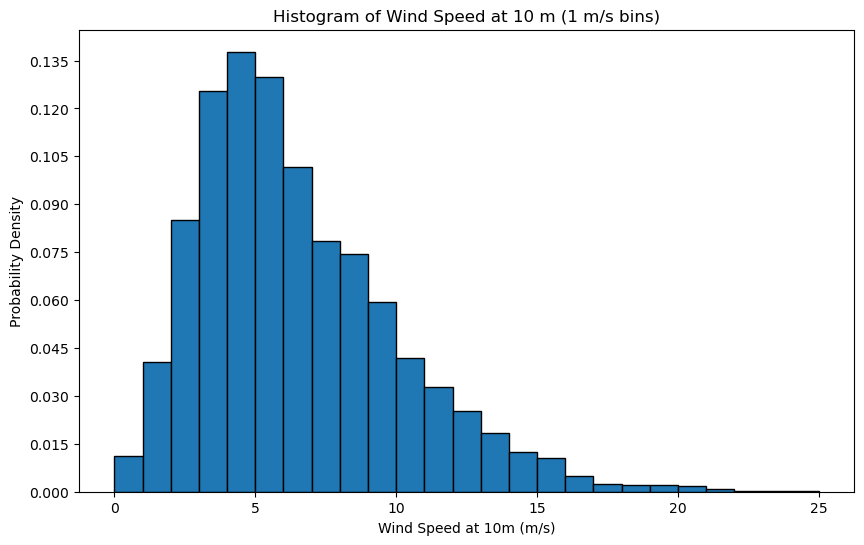

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(data_wind['WS10M'], bins=np.arange(0, data_wind['WS10M'].max() + 1, 1), edgecolor='black', density=True)
plt.xlabel('Wind Speed at 10m (m/s)')
plt.ylabel('Probability Density')
plt.title('Histogram of Wind Speed at 10 m (1 m/s bins)')
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

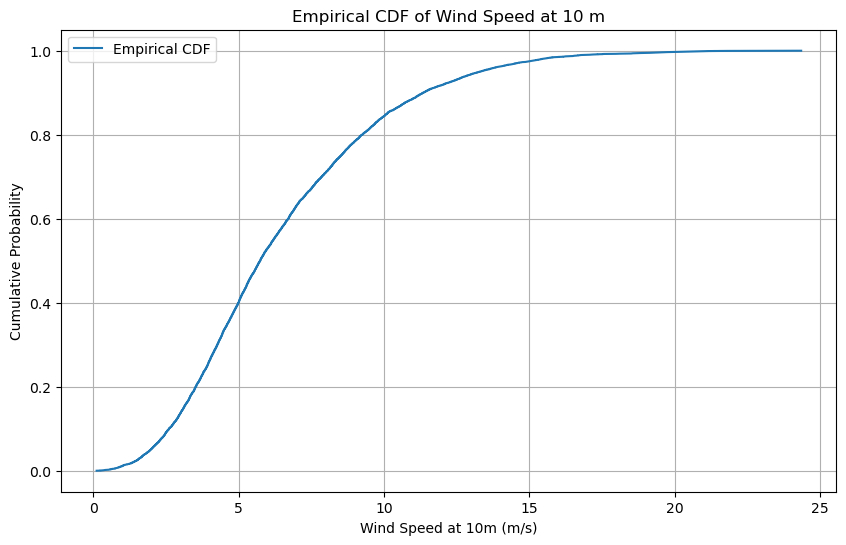

In [7]:
# Compute and plot the empirical CDF of wind speed at 10m
ws_sorted = np.sort(data_wind['WS10M'])
cdf = np.arange(1, len(ws_sorted) + 1) / len(ws_sorted)

plt.figure(figsize=(10, 6))
plt.plot(ws_sorted, cdf, label='Empirical CDF')
plt.xlabel('Wind Speed at 10m (m/s)')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of Wind Speed at 10 m')
plt.grid(True)
plt.legend()
plt.show()

Fitted coefficients: slope = 2.1295, intercept = -4.2209


C:\Users\aqdas\AppData\Local\Temp\ipykernel_9656\1134235400.py:5: RuntimeWarning: divide by zero encountered in log
  y = np.log(-np.log(1 - cdf))


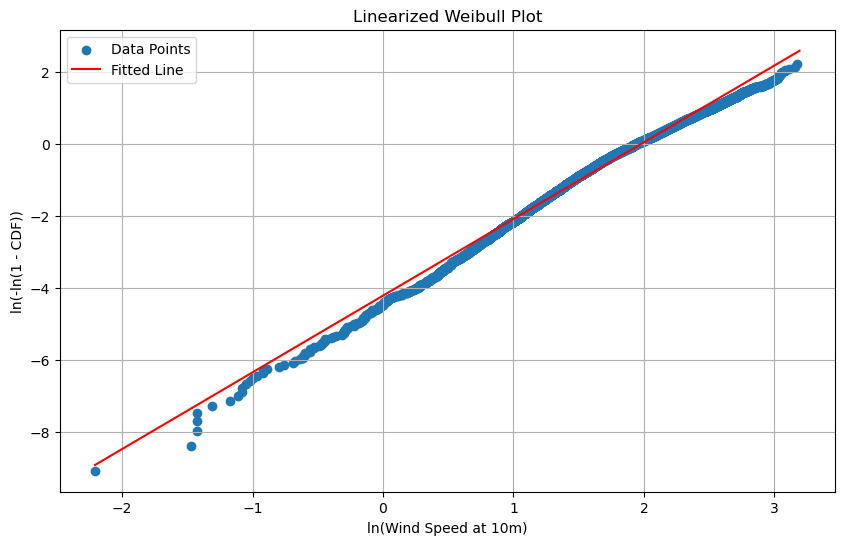

Weibull shape parameter (k): 2.1295
Weibull scale parameter (c): 7.2577
R^2 of the linear fit: 0.9905
RMSE of the linear fit: 0.1249


In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

x = np.log(ws_sorted)
y = np.log(-np.log(1 - cdf))

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Points')
coeffs = np.polyfit(x[np.isfinite(y)], y[np.isfinite(y)], 1)
print(f'Fitted coefficients: slope = {coeffs[0]:.4f}, intercept = {coeffs[1]:.4f}')
plt.plot(x, np.polyval(coeffs, x), color='red', label='Fitted Line')
plt.xlabel('ln(Wind Speed at 10m)')
plt.ylabel('ln(-ln(1 - CDF))')
plt.title('Linearized Weibull Plot')
plt.grid(True)
plt.legend()
plt.show()

k = coeffs[0]
b = coeffs[1]
c = np.exp(-b / k)

print(f'Weibull shape parameter (k): {coeffs[0]:.4f}')
print(f'Weibull scale parameter (c): {c:.4f}')

# Only use finite values for R^2 calculation
mask = np.isfinite(y)
r2 = r2_score(y[mask], np.polyval(coeffs, x[mask]))
print(f'R^2 of the linear fit: {r2:.4f}')
rmse = np.sqrt(mean_squared_error(y[mask], np.polyval(coeffs, x[mask])))
print(f'RMSE of the linear fit: {rmse:.4f}')

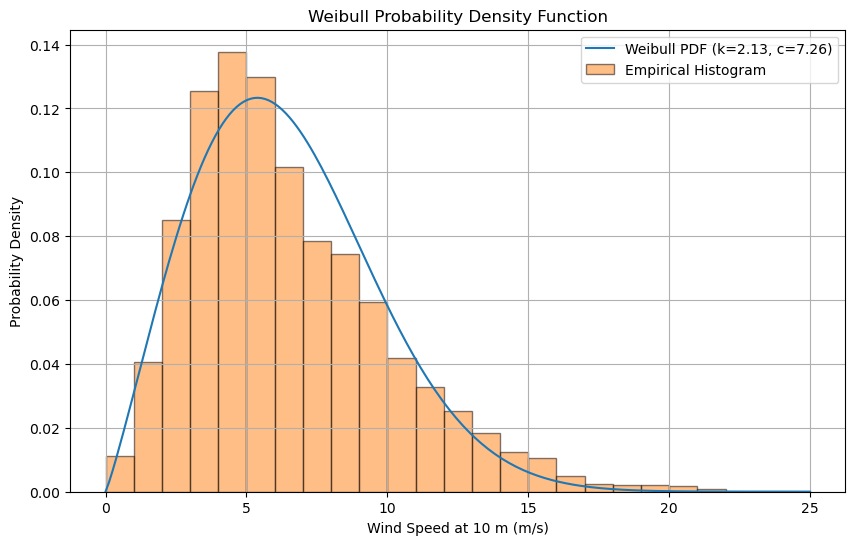

In [9]:
def weibull_pdf(x, k, c):
    """Weibull probability density function."""
    return (k / c) * (x / c) ** (k - 1) * np.exp(-(x / c) ** k)

# Example: plot Weibull PDF using estimated k and c
x_vals = np.linspace(0, 25, 200)
pdf_vals = weibull_pdf(x_vals, k, c)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, pdf_vals, label=f'Weibull PDF (k={k:.2f}, c={c:.2f})')
plt.hist(data_wind['WS10M'], bins=np.arange(0, data_wind['WS10M'].max() + 1, 1), density=True, alpha=0.5, edgecolor='black', label='Empirical Histogram')
plt.xlabel('Wind Speed at 10 m (m/s)')
plt.ylabel('Probability Density')
plt.title('Weibull Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()

Fitted Weibull shape parameter (k): 1.9420
Fitted Weibull scale parameter (c): 7.3378


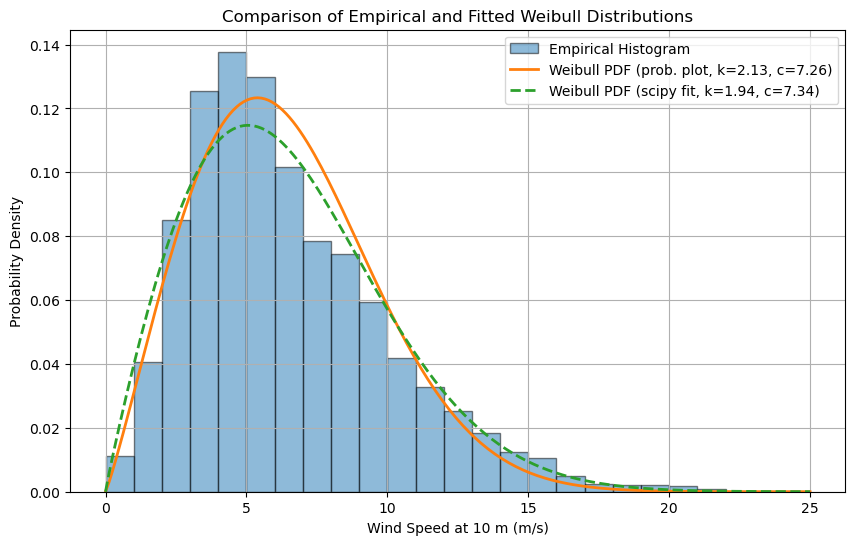

In [10]:
from scipy.stats import weibull_min

# Fit Weibull distribution to wind speed data using scipy
params = weibull_min.fit(data_wind['WS10M'], floc=0)
k_fit, loc_fit, c_fit = params
print(f"Fitted Weibull shape parameter (k): {k_fit:.4f}")
print(f"Fitted Weibull scale parameter (c): {c_fit:.4f}")

# Plot empirical histogram, Weibull fit (scipy), and Weibull fit (probability plot)
plt.figure(figsize=(10, 6))
plt.hist(data_wind['WS10M'], bins=np.arange(0, data_wind['WS10M'].max() + 1, 1), density=True, alpha=0.5, edgecolor='black', label='Empirical Histogram')

# Weibull PDF from probability plot fit
plt.plot(x_vals, pdf_vals, label=f'Weibull PDF (prob. plot, k={k:.2f}, c={c:.2f})', linewidth=2)

# Weibull PDF from scipy fit
pdf_fit = weibull_min.pdf(x_vals, k_fit, loc_fit, c_fit)
plt.plot(x_vals, pdf_fit, label=f'Weibull PDF (scipy fit, k={k_fit:.2f}, c={c_fit:.2f})', linestyle='--', linewidth=2)

plt.xlabel('Wind Speed at 10 m (m/s)')
plt.ylabel('Probability Density')
plt.title('Comparison of Empirical and Fitted Weibull Distributions')
plt.legend()
plt.grid(True)
plt.show()

Part 2

In [11]:
data_BAR.head()

,Wind Speed [m/s],Power [kW],Cp [-]
0,0.00,0.0,0.0
1,0.25,0.0,0.0
2,0.50,0.0,0.0
3,0.75,0.0,0.0
4,1.00,0.0,0.0


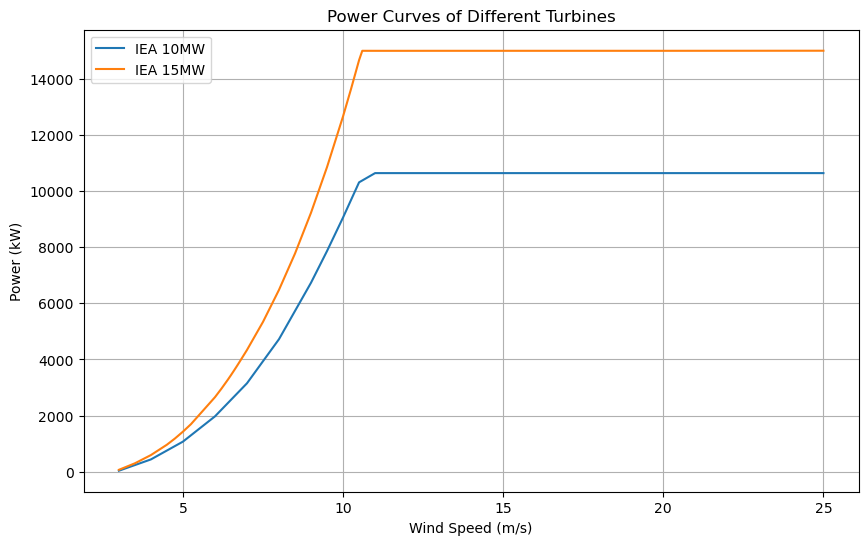

In [12]:
# Power Curves

plt.figure(figsize=(10, 6))
# plt.plot(data_BAR['Wind Speed [m/s]'], data_BAR['Power [kW]'], label='BAR LowSP 6.5MW')
plt.plot(data_IEA10['Wind Speed [m/s]'], data_IEA10['Power [kW]'], label='IEA 10MW')
plt.plot(data_IEA15['Wind Speed [m/s]'], data_IEA15['Power [kW]'], label='IEA 15MW')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.title('Power Curves of Different Turbines')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Check if the values in the last column are always greater than the second last column in data_wind
col_last = data_wind.columns[-1]
col_second_last = data_wind.columns[-2]
# Remove rows where the last column value is less than or equal to the second last column value
wind_speed = data_wind[data_wind[col_last] > data_wind[col_second_last]]

In [14]:
from scipy.optimize import brentq
import numpy as np

def solve_z0(U50, U10):
    """
    Solve for z0 in the equation:
    U50/U10 = ln(50/z0) / ln(10/z0)
    for each pair of U50 and U10 values (can be pandas Series).
    Returns a numpy array of z0 values, always positive and finite.
    """
    ratio = U50 / U10

    def func(z0, r):
        return np.log(50 / z0) / np.log(10 / z0) - r

    z0_solutions = []
    for r in ratio:
        # Clamp r to a reasonable range to avoid invalid or extreme values
        if not np.isfinite(r) or r <= 1.0:
            r = 1.0001  # minimum physically meaningful ratio
        try:
            # Use a safe bracket for z0 (e.g., 1e-6 to 5)
            z0_val = brentq(func, 1e-6, 5, args=(r,))
            if not np.isfinite(z0_val) or z0_val <= 0:
                z0_val = 1e-4  # fallback to a small positive value
            z0_solutions.append(z0_val)
        except Exception:
            # Fallback to a small positive value if root finding fails
            z0_solutions.append(1e-4)
    return np.array(z0_solutions)

z0 = solve_z0(wind_speed['WS50M'], wind_speed['WS10M'])

U119 = wind_speed['WS10M'] * np.log(119 / z0) / np.log(10 / z0)
U150 = wind_speed['WS10M'] * np.log(150 / z0) / np.log(10 / z0)

In [15]:
has_nan_z0 = np.isnan(z0).any()
print(f"Does z0 contain NaN values? {has_nan_z0}")

Does z0 contain NaN values? False


In [16]:
# Check for NaN values in the last two columns of wind_speed
nan_in_last_two = wind_speed.iloc[:, -2:].isna().any().any()
print(f"NaN in last two columns (WS119M, WS150M): {nan_in_last_two}")

NaN in last two columns (WS119M, WS150M): False


In [17]:
from scipy.interpolate import interp1d

def pdf(k,c,U):
    f = k/c * (U/c)**(k-1) * np.exp(-(U/c)**k)
    return f

Power_data1 = data_IEA10[['Wind Speed [m/s]', 'Power [kW]']]
Power_data2 = data_IEA15[['Wind Speed [m/s]', 'Power [kW]']]
# Interpolate Power_data1
ws1 = Power_data1['Wind Speed [m/s]']
p1 = Power_data1['Power [kW]']
ws1_interp = np.linspace(ws1.min(), ws1.max(), (len(ws1)-1)*100 + 1)
p1_interp_func = interp1d(ws1, p1, kind='linear')
p1_interp = p1_interp_func(ws1_interp)
Power_data1_interp = pd.DataFrame({'Wind Speed [m/s]': ws1_interp, 'Power [kW]': p1_interp})

# Interpolate Power_data2
ws2 = Power_data2['Wind Speed [m/s]']
p2 = Power_data2['Power [kW]']
ws2_interp = np.linspace(ws2.min(), ws2.max(), (len(ws2)-1)*100 + 1)
p2_interp_func = interp1d(ws2, p2, kind='linear')
p2_interp = p2_interp_func(ws2_interp)
Power_data2_interp = pd.DataFrame({'Wind Speed [m/s]': ws2_interp, 'Power [kW]': p2_interp})




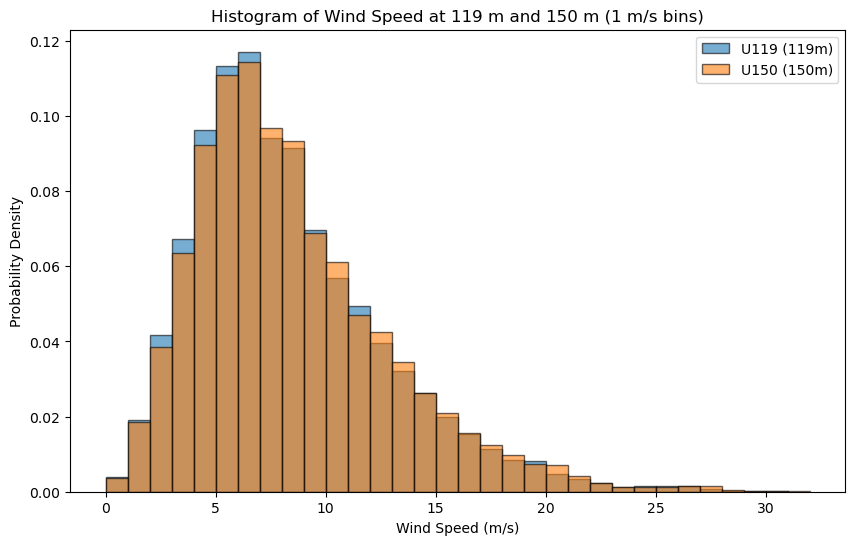

U119 Weibull shape (k): 2.0164, scale (c): 9.3955
U150 Weibull shape (k): 2.0181, scale (c): 9.5825


In [18]:
from scipy.stats import weibull_min

plt.figure(figsize=(10, 6))
plt.hist(U119, bins=np.arange(0, U119.max() + 1, 1), edgecolor='black', density=True, alpha=0.6, label='U119 (119m)')
plt.hist(U150, bins=np.arange(0, U150.max() + 1, 1), edgecolor='black', density=True, alpha=0.6, label='U150 (150m)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Probability Density')
plt.title('Histogram of Wind Speed at 119 m and 150 m (1 m/s bins)')
plt.legend()
plt.show()
# Fit Weibull distribution to U119
params_119 = weibull_min.fit(U119, floc=0)
k_119, loc_119, c_119 = params_119
print(f"U119 Weibull shape (k): {k_119:.4f}, scale (c): {c_119:.4f}")

# Fit Weibull distribution to U150
params_150 = weibull_min.fit(U150, floc=0)
k_150, loc_150, c_150 = params_150
print(f"U150 Weibull shape (k): {k_150:.4f}, scale (c): {c_150:.4f}")

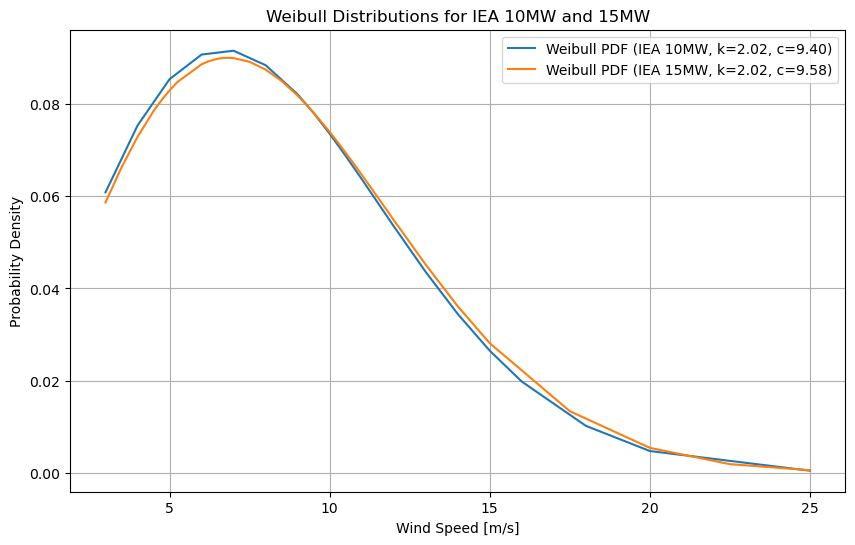

In [19]:
# Generate Weibull distribution using k and c
U_119 = data_IEA10['Wind Speed [m/s]'].values
U_150 = data_IEA15['Wind Speed [m/s]'].values


weibull_pdf_119 = weibull_pdf(U_119, k_119, c_119)
weibull_pdf_150 = weibull_pdf(U_150, k_150, c_150)

plt.figure(figsize=(10, 6))
plt.plot(U_119, weibull_pdf_119, label=f'Weibull PDF (IEA 10MW, k={k_119:.2f}, c={c_119:.2f})')
plt.plot(U_150, weibull_pdf_150, label=f'Weibull PDF (IEA 15MW, k={k_150:.2f}, c={c_150:.2f})')
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('Probability Density')
plt.title('Weibull Distributions for IEA 10MW and 15MW')
plt.legend()
plt.grid(True)
plt.show()

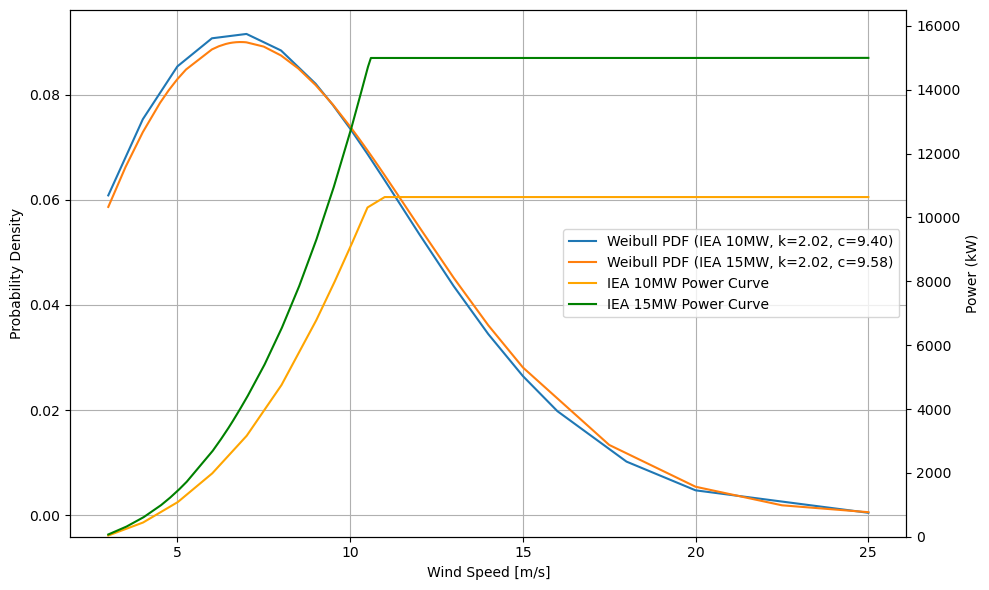

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Weibull PDFs on primary y-axis
l1, = ax1.plot(U_119, weibull_pdf_119, label=f'Weibull PDF (IEA 10MW, k={k_119:.2f}, c={c_119:.2f})')
l2, = ax1.plot(U_150, weibull_pdf_150, label=f'Weibull PDF (IEA 15MW, k={k_150:.2f}, c={c_150:.2f})')
ax1.set_xlabel('Wind Speed [m/s]')
ax1.set_ylabel('Probability Density')
ax1.grid(True)

# Secondary y-axis for actual power curves (kW)
ax2 = ax1.twinx()
l3, = ax2.plot(Power_data1_interp['Wind Speed [m/s]'], Power_data1_interp['Power [kW]'], 
               label='IEA 10MW Power Curve', color='orange', linestyle='-')
l4, = ax2.plot(Power_data2_interp['Wind Speed [m/s]'], Power_data2_interp['Power [kW]'], 
               label='IEA 15MW Power Curve', color='green', linestyle='-')
ax2.set_ylabel('Power (kW)')
# Optionally, set y-limits for better visualization
ax2.set_ylim(0, max(Power_data2_interp['Power [kW]'].max(), Power_data1_interp['Power [kW]'].max()) * 1.1)

# Combine legends from both axes
lines = [l1, l2, l3, l4]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='right')

plt.title('Weibull Distributions and Power Curves')
plt.tight_layout()
plt.show()

In [21]:
AEY_119 = 24 * 365 * np.trapz(Power_data1['Power [kW]'].values * weibull_pdf_119, U_119) / 1000  # MWh
AEY_150 = 24 * 365 * np.trapz(Power_data2['Power [kW]'].values * weibull_pdf_150, U_150) / 1000  # MWh

print(f'Annual Energy Yield (IEA 10MW at 119m): {AEY_119:.2f} MWh')
print(f'Annual Energy Yield (IEA 15MW at 150m): {AEY_150:.2f} MWh')



Annual Energy Yield (IEA 10MW at 119m): 46682.49 MWh
Annual Energy Yield (IEA 15MW at 150m): 66641.35 MWh


In [22]:
CF_119 = AEY_119 / (10 * 24 * 365)  # Capacity factor for 10MW turbine
CF_150 = AEY_150 / (15 * 24 * 365)  # Capacity factor for 15MW turbine

print(f'Capacity Factor (IEA 10MW at 119m): {CF_119:.4f}')
print(f'Capacity Factor (IEA 15MW at 150m): {CF_150:.4f}')

Capacity Factor (IEA 10MW at 119m): 0.5329
Capacity Factor (IEA 15MW at 150m): 0.5072


Part 3

In [23]:
import numpy as np
ρ_air =1.205 #kg/m^3
R = 110 #m
A = np.pi*R**2 #m^2
η = 0.97 #overall_efficiency
P_e = 14.1e6 #W
U_rated = 11 #m/s

#max Cp from appendix2
Cp_max = 0.48

#question1
#CaseA U0=10m/s
U0_A = 10 #m/s
U2_A = 7 #m/s
U1_A = (U0_A + U2_A) / 2 #m/s
a_A = (U0_A - U1_A) / U0_A
Cp_A = 4*a_A*(1-a_A)**2
print("U1_A:", U1_A, "a_A:", a_A)
print(f"{Cp_A:.3f}", "Cp_A is accepted" if Cp_A <= Cp_max else "Cp_A is rejected")

#CaseB U1=10m/s

U1_B = 10 #m/s
U2_B = 7 #m/s
U0_B = 2*U1_B - U2_B #m/s
a_B = (U0_B - U1_B) / U0_B
Cp_B = 4*a_B*(1-a_B)**2

print("U1_B:", U1_B, "a_B:", a_B)
print(f"{Cp_B:.3f}", "Cp_B is accepted" if Cp_B <= Cp_max else "Cp_B is rejected")




U1_A: 8.5 a_A: 0.15
0.433 Cp_A is accepted
U1_B: 10 a_B: 0.23076923076923078
0.546 Cp_B is rejected


In [24]:
#question2
U0 = 15 #m/s
ω =7.8 #rpm
λ = ω*R/U0 * (2*np.pi/60)
print(f"Tip speed ratio λ: {λ:.3f}")

P_mech = P_e / η
Cp_rated = P_mech / (0.5*ρ_air*A*U0**3)
print(f"Mechanical Power P_mech: {P_mech/1e6:.3f} MW")
print(f"Power Coefficient Cp: {Cp_rated:.3f}")


Tip speed ratio λ: 5.990
Mechanical Power P_mech: 14.536 MW
Power Coefficient Cp: 0.188


In [25]:
#question3
U0 = 9 #m/s < 11m/s
λ = ω*R/U0 * (2*np.pi/60)
print(f"Tip speed ratio λ at U0=9m/s: {λ:.3f}")

β = 0 #degrees
λ_i = 1/(1/(λ+0.02*β) - 0.003/(β**3 + 1))
print(f"λ_i at U0=9m/s: {λ_i:.3f}")

Cp_β_λ_i = 0.79*(151/λ_i - 0.58*β - 0.002*β**2.14-13.2)*np.exp(-18.4/λ_i)


print(f"Power Coefficient Cp at U0=9m/s: {Cp_β_λ_i:.3f}")


Tip speed ratio λ at U0=9m/s: 9.983
λ_i at U0=9m/s: 10.292
Power Coefficient Cp at U0=9m/s: 0.195


In [26]:
#question4
import sympy as sp

# Given Cp_rated (use a SymPy Float or a Rational for robustness)
Cp_rated = sp.Float(0.484)         # or sp.Rational(121, 250)
a = sp.symbols('a', real=True)

# Build the cubic: 4a(1-a)^2 - Cp_rated = 0  ->  4a^3 - 8a^2 + 4a - Cp_rated
poly = sp.expand(4*a*(1 - a)**2 - Cp_rated)

# Numeric roots with good tolerance
rts = sp.nroots(poly)  # complex approximations
real_roots = sorted([float(sp.re(r)) for r in rts if abs(sp.im(r)) < 1e-8])

print("All real roots a:", ", ".join(f"{r:.6f}" for r in real_roots))

# Classify
accepted = [r for r in real_roots if 0.0 <= r <= 1.0]
declined  = [r for r in real_roots if r > 1.0]

if declined:
    print("Declined root (> 1):", ", ".join(f"{r:.6f}" for r in declined))
print("Accepted roots (0 ≤ a ≤ 1):", ", ".join(f"{r:.6f}" for r in accepted))

# (Optional) highlight the physically relevant actuator-disk root a < 0.5
phys = [r for r in accepted if r < 0.5]
if phys:
    print(f"Physical actuator-disk root (a < 0.5): {phys[-1]:.6f}")


a_1 = [r for r in accepted if r < 0.5]
a_2 = [r for r in accepted if r >= 0.5]

CT_1 = 4*a_1[0]*(1-a_1[0])
CT_2 = 4*a_2[0]*(1-a_2[0])
print(f"Thrust Coefficient CT for a_1: {CT_1:.3f}")
print(f"Thrust Coefficient CT for a_2: {CT_2:.3f}")

T_1 = CT_1 * 0.5 * ρ_air * A * U0**2
T_2 = CT_2 * 0.5 * ρ_air * A * U0**2
print(f"Thrust T for a_1: {T_1/1e3:.3f} kN")
print(f"Thrust T for a_2: {T_2/1e3:.3f} kN")






All real roots a: 0.179915, 0.515532, 1.304552
Declined root (> 1): 1.304552
Accepted roots (0 ≤ a ≤ 1): 0.179915, 0.515532
Physical actuator-disk root (a < 0.5): 0.179915
Thrust Coefficient CT for a_1: 0.590
Thrust Coefficient CT for a_2: 0.999
Thrust T for a_1: 1094.873 kN
Thrust T for a_2: 1853.352 kN
